In [41]:
import torch.nn as nn
import torch.nn.functional as F

In [42]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim = 1)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [43]:
import torch
X = torch.rand((28, 28))
X = X.view(-1,28*28)

In [44]:
X[0]

tensor([0.9000, 0.1665, 0.4150, 0.3786, 0.7605, 0.9374, 0.5741, 0.9877, 0.6118,
        0.7336, 0.1307, 0.2580, 0.7355, 0.0367, 0.7604, 0.9343, 0.0599, 0.3981,
        0.2454, 0.5602, 0.8799, 0.2017, 0.1747, 0.3045, 0.1147, 0.7156, 0.2317,
        0.7840, 0.1358, 0.2912, 0.2422, 0.4500, 0.2963, 0.8793, 0.0322, 0.2072,
        0.7095, 0.6580, 0.6795, 0.5497, 0.9890, 0.9816, 0.7644, 0.9666, 0.3624,
        0.7134, 0.3017, 0.7180, 0.1836, 0.7728, 0.1415, 0.8671, 0.4501, 0.7466,
        0.5559, 0.6874, 0.2497, 0.8179, 0.0483, 0.6816, 0.9270, 0.0470, 0.3863,
        0.3850, 0.2854, 0.6595, 0.5373, 0.1710, 0.7079, 0.1537, 0.9319, 0.8496,
        0.2876, 0.5940, 0.4844, 0.4150, 0.6669, 0.8707, 0.8326, 0.9538, 0.1105,
        0.4483, 0.3316, 0.1372, 0.6255, 0.7105, 0.1894, 0.0965, 0.3066, 0.6774,
        0.5814, 0.2908, 0.8380, 0.6884, 0.5044, 0.6961, 0.4162, 0.8658, 0.7357,
        0.4971, 0.6189, 0.5398, 0.7492, 0.1915, 0.7434, 0.7372, 0.2103, 0.0427,
        0.9652, 0.7923, 0.7319, 0.5259, 

In [45]:
output = net(X)

In [46]:
output

tensor([[-2.3258, -2.2932, -2.3684, -2.1787, -2.2029, -2.3297, -2.3537, -2.4729,
         -2.2075, -2.3290]], grad_fn=<LogSoftmaxBackward>)

In [47]:
import torch
import torchvision
from torchvision import transforms, datasets
train = datasets.MNIST("",train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [48]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [49]:
import torch.optim as optim

optimzer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3
for epoch in range(EPOCHS):
    # data is the batch of fetures sets anf=d Labels
    X, y = data
    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimzer.step()
    print(loss)

tensor(2.2793, grad_fn=<NllLossBackward>)
tensor(2.2587, grad_fn=<NllLossBackward>)
tensor(2.2405, grad_fn=<NllLossBackward>)


In [50]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1 
            total += 1 
print("Accuracy : ", round(correct/total,3))            
        

Accuracy :  0.098


In [51]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [52]:
import matplotlib.pyplot as plt

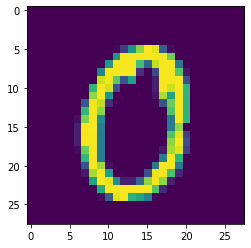

In [53]:
plt.imshow(X[8].view(28,28))
plt.show()

In [54]:
print(torch.argmax(net(X[8].view(-1,784))[0]))

tensor(8, grad_fn=<NotImplemented>)
